# RocketPy Simulation
This notebook was generated using Rocket-Serializer, a RocketPy tool to convert simulation files to RocketPy simulations
The notebook was generated using the following parameters file: `examples/rocket_with_elliptical_fins/parameters.json`


In [9]:
%pip install rocketpy<=2.0

/bin/bash: line 1: =2.0: No such file or directory
Note: you may need to restart the kernel to use updated packages.


In [10]:
from rocketpy import (
    Environment,
    SolidMotor,
    Rocket,
    Flight,
    TrapezoidalFins,
    EllipticalFins,
    RailButtons,
    NoseCone,
    Tail,
)
import datetime

## Environment


In [11]:
env = Environment()
env.set_location(latitude=28.61, longitude=-80.6)
env.set_elevation(0.0)

Optionally, you can set the date and atmospheric model


In [12]:
tomorrow = datetime.date.today() + datetime.timedelta(days=1)
env.set_date((tomorrow.year, tomorrow.month, tomorrow.day, 12))
env.set_atmospheric_model(type="Forecast", file="GFS")

oc_open: server error retrieving url: code=0 message="/gfs_0p25/gfs20240611/gfs_0p25_00z is not an available dataset"

In [ ]:
env.all_info()

## Motor
Currently, only Solid Motors are supported by Rocket-Serializer
If you want to use a Liquid or Hybrid motor, please use rocketpy directly.


In [13]:
motor = SolidMotor(
    thrust_source="thrust_source.csv",
    dry_mass=0,
    center_of_dry_mass_position=0,
    dry_inertia=[0, 0, 0],
    grains_center_of_mass_position=0,
    grain_number=1,
    grain_density=692.6964523164174,
    grain_outer_radius=0.019,
    grain_initial_inner_radius=0.0095,
    grain_initial_height=0.12219999694824218,
    grain_separation=0,
    nozzle_radius=0.014249999999999999,
    nozzle_position=-0.06109999847412109,
    throat_radius=0.0095,
    reshape_thrust_curve=False,  # Not implemented in Rocket-Serializer
    interpolation_method="linear",
    coordinate_system_orientation="nozzle_to_combustion_chamber",
)

In [ ]:
motor.all_info()

## Rocket
Currently, only single stage rockets are supported by Rocket-Serializer
We will start by defining the aerodynamic surfaces, and then build the rocket.


### Nosecones


In [14]:
nosecone = NoseCone(
    length=0.15000000000000002,
    kind="ogive",
    base_radius=0.025,
    rocket_radius=0.025,
    name="0.15000000000000002",
)

### Fins
As rocketpy allows for multiple fins sets, we will create a dictionary with all the fins sets and then add them to the rocket


In [15]:
elliptical_fins = {}

In [16]:
elliptical_fins[0] = EllipticalFins(
    n=4,
    root_chord=0.09,
    span=0.08,
    rocket_radius=0.025,
    cant_angle=0.0,
    name="Elliptical Fin Set",
)

### Transitions (Tails)
As rocketpy allows for multiple tails, we will create a dictionary with all the tails and then add them to the rocket


In [17]:
tails = {}

In [18]:
tails[0] = Tail(
    top_radius=0.025,
    bottom_radius=0.015,
    length=0.02500000000000002,
    rocket_radius=0.025,
    name="Transition",
)

In [19]:
tails[1] = Tail(
    top_radius=0.015,
    bottom_radius=0.025,
    length=0.11,
    rocket_radius=0.025,
    name="Transition",
)

In [20]:
rocket = Rocket(
    radius=0.025,
    mass=0.437,
    inertia=[0.000278, 0.000278, 0.024],
    power_off_drag="drag_curve.csv",
    power_on_drag="drag_curve.csv",
    center_of_mass_without_motor=0.489,
    coordinate_system_orientation="nose_to_tail",
)

### Adding surfaces to the rocket
Now that we have all the surfaces, we can add them to the rocket


In [21]:
rocket.add_surfaces(
    surfaces=[nosecone, elliptical_fins[0], tails[0], tails[1]],
    positions=[0.0, 0.6250000000000001, 0.20000000000000007, 0.4250000000000001],
)

In [22]:
rocket.add_motor(motor, position=0.6728055555555557)


Inertia Details

Rocket Mass: 0.437 kg (without motor)
Rocket Dry Mass: 0.437 kg (with unloaded motor)
Rocket Loaded Mass: 0.509 kg (with loaded motor)
Rocket Inertia (with unloaded motor) 11: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 22: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 33: 0.024 kg*m2
Rocket Inertia (with unloaded motor) 12: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 13: 0.000 kg*m2
Rocket Inertia (with unloaded motor) 23: 0.000 kg*m2

Geometrical Parameters

Rocket Maximum Radius: 0.025 m
Rocket Frontal Area: 0.001963 m2

Rocket Distances
Rocket Center of Dry Mass - Center of Mass without Motor: 0.000 m
Rocket Center of Dry Mass - Nozzle Exit: 0.245 m
Rocket Center of Dry Mass - Center of Propellant Mass: 0.184 m
Rocket Center of Mass - Rocket Loaded Center of Mass: 0.026 m


Aerodynamics Lift Coefficient Derivatives

0.15000000000000002 Lift Coefficient Derivative: 2.000/rad
Elliptical Fin Set Lift Coefficient Derivative: 20.202/rad
Transition Lift Coe

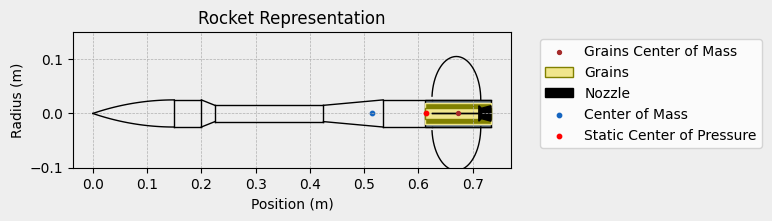


Mass Plots
----------------------------------------


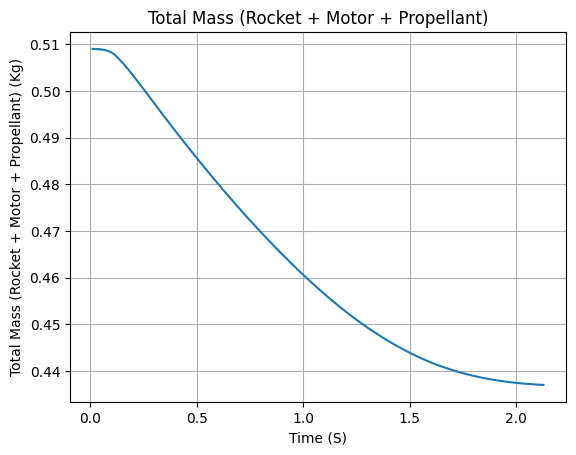

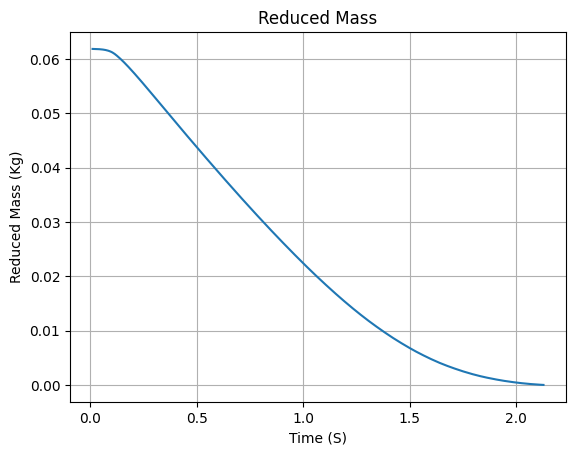


Aerodynamics Plots
----------------------------------------
Drag Plots
--------------------


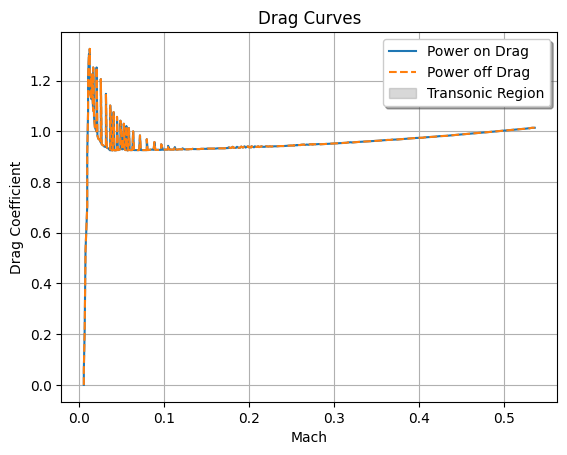


Stability Plots
--------------------


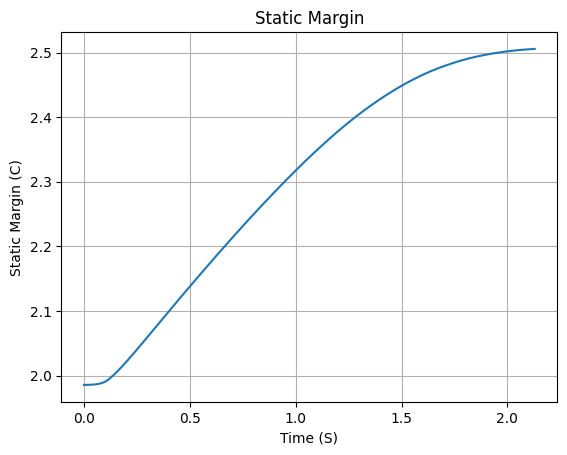

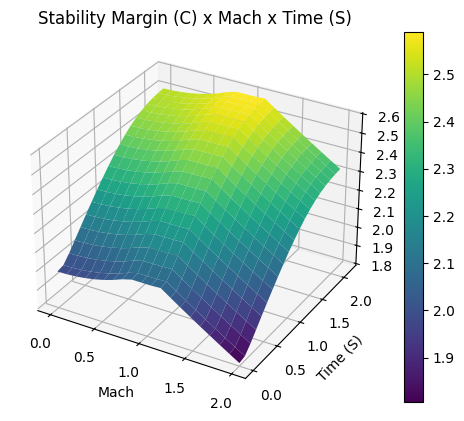


Thrust-to-Weight Plot
----------------------------------------


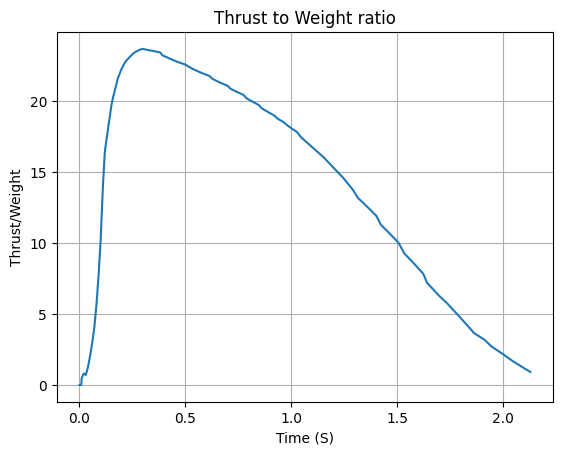

In [23]:
### Rocket Info
rocket.all_info()

## Flight
We will now create the flight simulation. Let's go!


In [ ]:
flight = Flight(
    rocket=rocket,
    environment=env,
    rail_length=1.0,
    inclination=90.0,
    heading=90.0,
    terminate_on_apogee=False,
    max_time=600,
)

In [ ]:
flight.all_info()